In [2]:
import numpy as np
import yaml

In [2]:
# read parquet files' meta

import os
import pandas as pd
import yaml
import pyarrow.parquet as pq

config = yaml.safe_load(open("config/config.yaml"))

per_year_outputs_path = config["per_year_outputs_path"]
parquet_files = [f for f in os.listdir(per_year_outputs_path) if f.endswith('.parquet')]
print("parquet file lists: ", parquet_files)

read_file_path = os.path.join(per_year_outputs_path, parquet_files[0])
print("read: ", read_file_path)

input("press enter to read the selected parquet file meta...")

parquet_file = pq.ParquetFile(read_file_path)
num_rows = parquet_file.metadata.num_rows
num_columns = parquet_file.metadata.num_columns
column_names = parquet_file.schema.names

print(f"文件包含 {num_rows} 行, {num_columns} 列")
print("列名：", column_names)

parquet file lists:  ['daily_pixel_data_2020.parquet', 'daily_pixel_data_2021.parquet', 'daily_pixel_data_2022.parquet', 'daily_pixel_data_2023.parquet', 'daily_pixel_data_2024.parquet']
read:  /mnt/c/Users/jebediahc/OneDrive/鱼丸车仔/TUM-before-arrival/Project Earth Observation Data Analysis/Project-files-Soil-Moisture/per_year_outputs/daily_pixel_data_2020.parquet
文件包含 45121942 行, 11 列
列名： ['latitude', 'longitude', 'number', 'swvl1_m3m3', 'tp_mm_day', 'e_mm_day', 'ro_mm_day', 'date', 'year', 'month', 'doy']


<xarray.Dataset> Size: 3GB
Dimensions:     (valid_time: 744, latitude: 371, longitude: 701)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 2020-01-01 ... 2020-01-31T23:...
  * latitude    (latitude) float64 3kB 72.0 71.9 71.8 71.7 ... 35.2 35.1 35.0
  * longitude   (longitude) float64 6kB -25.0 -24.9 -24.8 ... 44.8 44.9 45.0
    expver      (valid_time) <U4 12kB ...
Data variables:
    swvl1       (valid_time, latitude, longitude) float32 774MB ...
    ro          (valid_time, latitude, longitude) float32 774MB ...
    e           (valid_time, latitude, longitude) float32 774MB ...
    tp          (valid_time, latitude, longitude) float32 774MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:               

/home/jebediahc/anaconda3/envs/soil/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/jebediahc/anaconda3/envs/soil/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


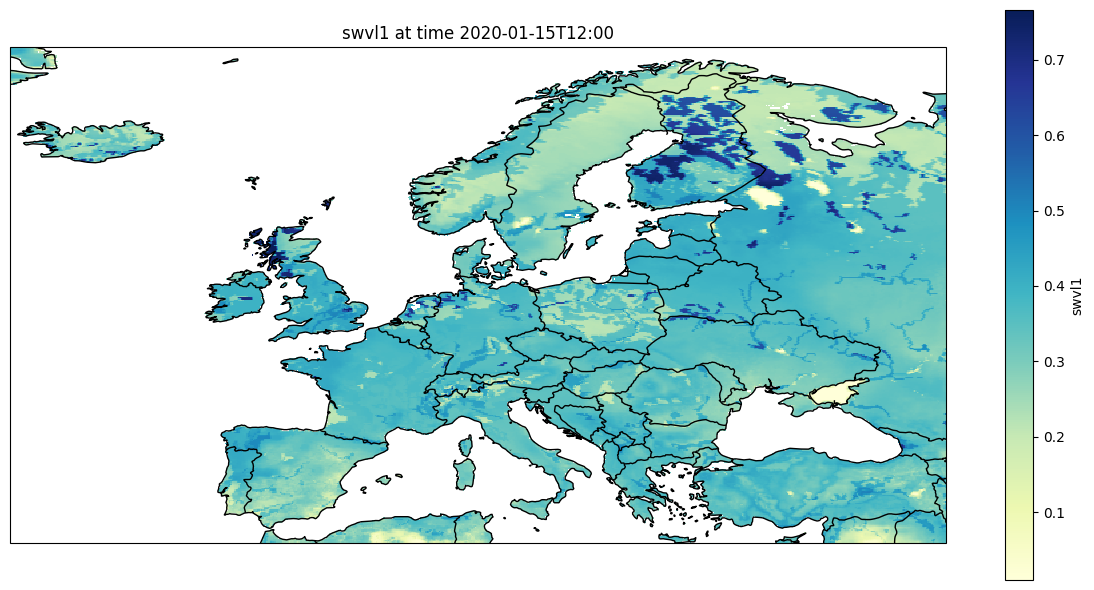

In [ ]:
# read nc and virtualize test
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ds = xr.open_dataset("data/2020-1.nc")

print(ds)

variable_name = "swvl1"
time_str = "2020-01-15T12:00"


data = ds[variable_name].sel(valid_time=time_str)  # 选择某个时间点
lat = ds.latitude
lon = ds.longitude

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = ax.pcolormesh(lon, lat, data, cmap='YlGnBu', shading='auto')

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title(f"{variable_name} at time {time_str}")
plt.colorbar(im, orientation='vertical', label=variable_name)
plt.tight_layout()
plt.show()

In [3]:
from src.preprocess import run_preprocessing
run_preprocessing()

preprocessing run


Data for 2020-01-15 downloaded successfully.
Preprocessing data from data/raw to data/processed...
Data preprocessing completed. Processed data saved to data/processed.
Visualizing data...
<xarray.Dataset> Size: 3GB
Dimensions:     (valid_time: 744, latitude: 371, longitude: 701)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 2020-01-01 ... 2020-01-31T23:...
  * latitude    (latitude) float64 3kB 72.0 71.9 71.8 71.7 ... 35.2 35.1 35.0
  * longitude   (longitude) float64 6kB -25.0 -24.9 -24.8 ... 44.8 44.9 45.0
    expver      (valid_time) <U4 12kB ...
Data variables:
    swvl1       (valid_time, latitude, longitude) float32 774MB ...
    ro          (valid_time, latitude, longitude) float32 774MB ...
    e           (valid_time, latitude, longitude) float32 774MB ...
    tp          (valid_time, latitude, longitude) float32 774MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Wea

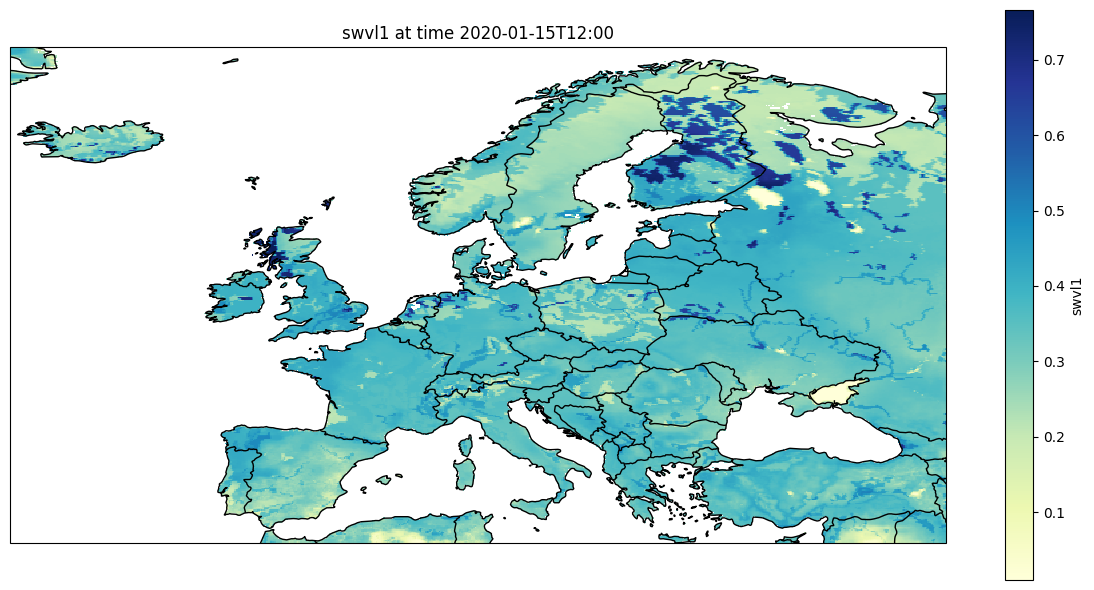

Visualization completed.
Loading model from ...
Using empty model as placeholder.
Model loaded successfully.
Running evaluation...
Evaluation Metrics:
RMSE: 0.01857
R²  : 0.95775
MAE : 0.00959
MSE : 0.00034


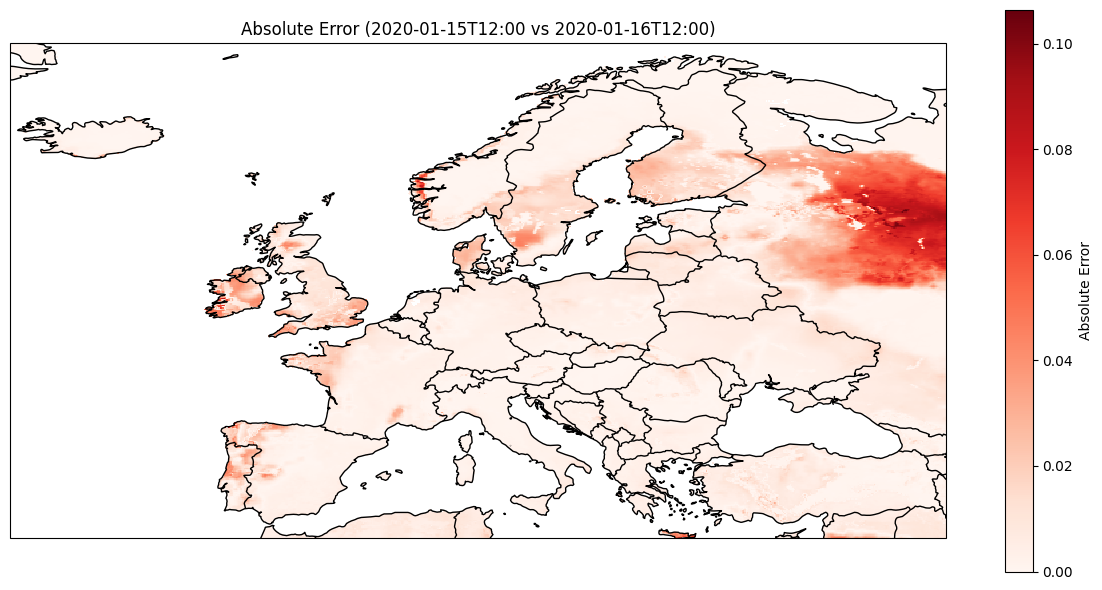

Evaluation completed.


In [4]:
# main file developing

import sys, os
sys.path.append(os.path.join(os.getcwd(), 'src'))

from src import download, preprocess, evaluate, predict, visualize, load_model

download.download()
preprocess.run_preprocessing()
visualize.visualize_data()
load_model.load_model("")
predict.run_prediction("","")
evaluate.run_evaluation()


In [10]:
# handy calculator
30*24

720